Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('survey.csv')

In [3]:
# printing the first 5 rows of the dataframe
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,1,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,0,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# number of rows and columns in the dataframe
df.shape

(1259, 27)

In [5]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   int64 
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# getting some statistical measures about the data
df.describe()

,Age,treatment
count,1.259000e+03,1259.000000
mean,7.942815e+07,0.505957
std,2.818299e+09,0.500163
min,-1.726000e+03,0.000000
25%,2.700000e+01,0.000000
50%,3.100000e+01,1.000000
75%,3.600000e+01,1.000000
max,1.000000e+11,1.000000


<AxesSubplot:>

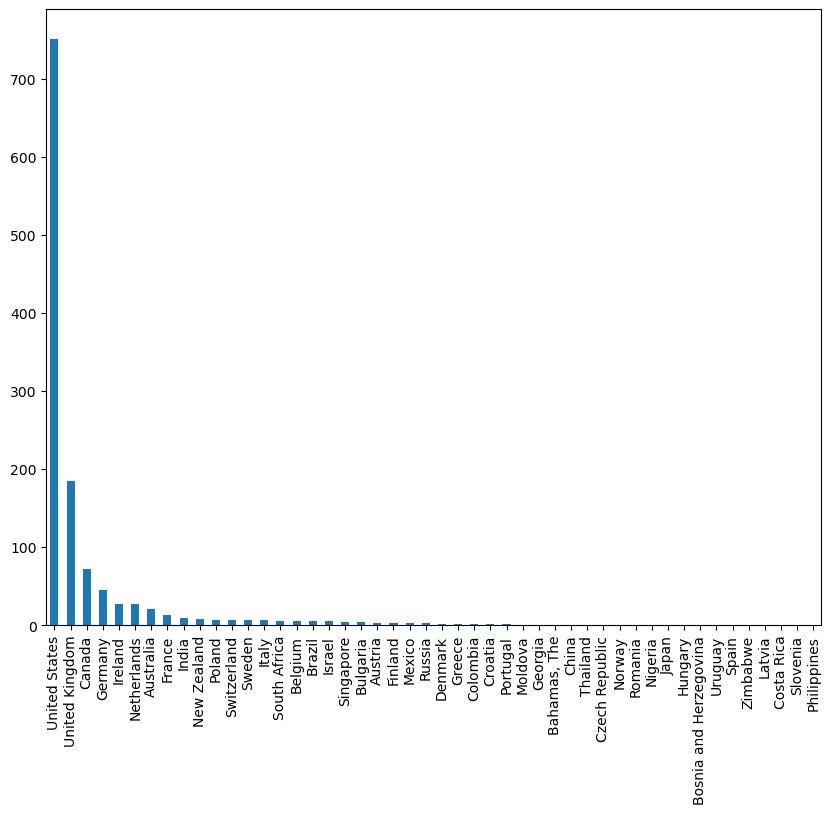

In [7]:

df['Country'].value_counts().plot(kind="bar",figsize=(10,8))

In [8]:
df.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [9]:
# checking for missing values in each column
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [11]:
df['self_employed'].fillna("No",inplace=True)

In [12]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [13]:
df['work_interfere'].fillna("N/A",inplace=True)

<AxesSubplot:>

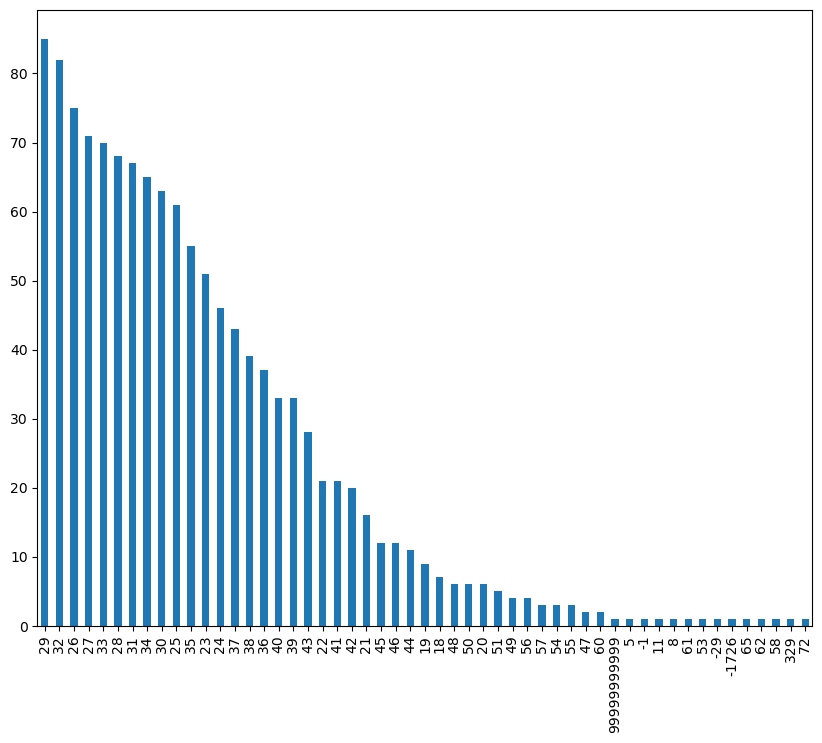

In [14]:
df['Age'].value_counts().plot(kind="bar",figsize=(10,8))

In [15]:
df.drop(df[(df['Age']>60) | (df['Age']<18)].index , inplace=True)

<AxesSubplot:>

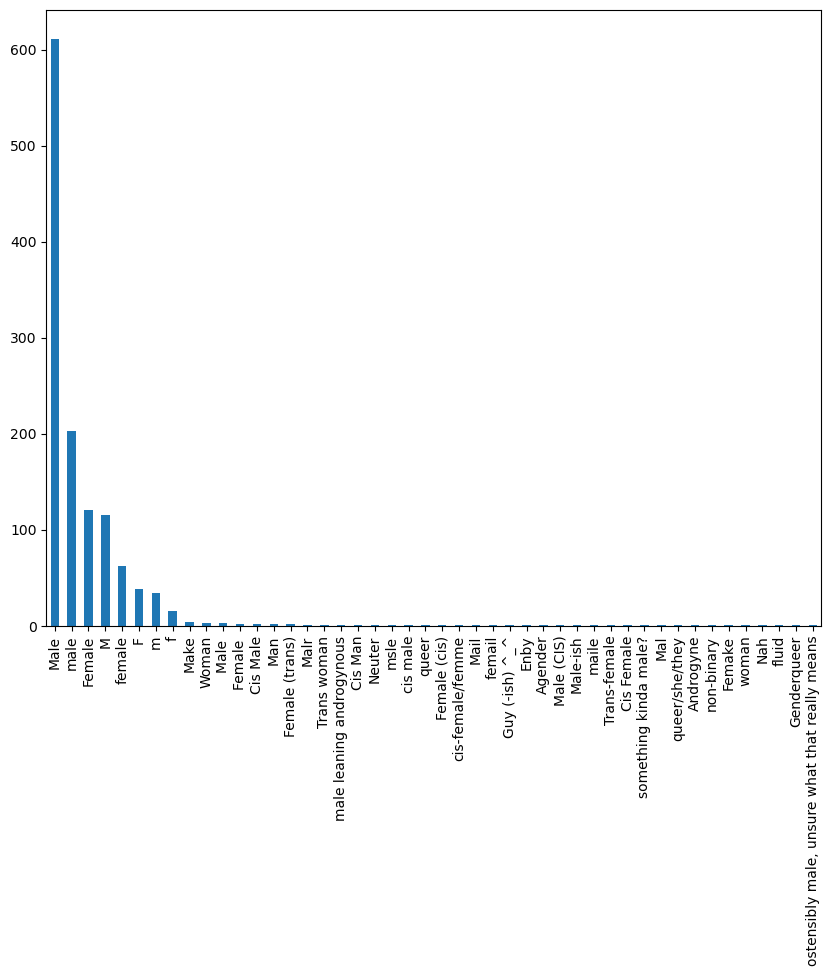

In [16]:
df['Gender'].value_counts().plot(kind="bar",figsize=(10,8))

In [17]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)
print(df['Gender'].unique())

['Female' 'Male' 'Other']


In [18]:
#Our data is clean now ? let's see.
if df.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [19]:
#Let's check duplicated data.
if df.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('Tehre is {} duplicated data:'.format(df.duplicated().sum()))
    #If there is duplicated data drop it.
    df.drop_duplicates(inplace=True)
    
print('-'*50)
print(df.duplicated().sum())

Tehre is 4 duplicated data:
--------------------------------------------------
0


<Figure size 1000x600 with 0 Axes>

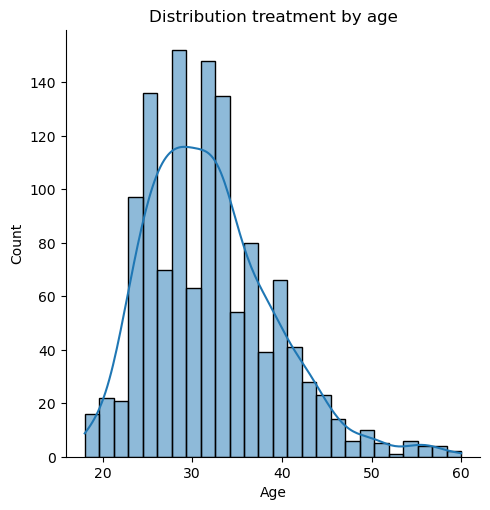

In [20]:
#In this plot moreover on Age distribution we can see treatment distribution by age
plt.figure(figsize=(10, 6));
sb.displot(df['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mental_vs_physical', ylabel='count'>

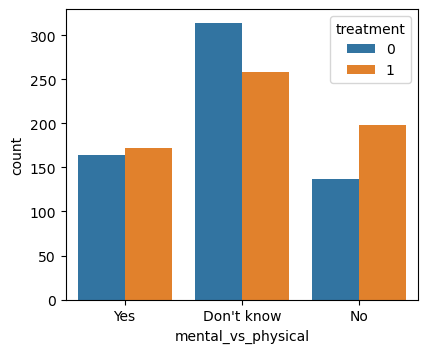

In [21]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['mental_vs_physical'], hue=df['treatment'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Interfere')

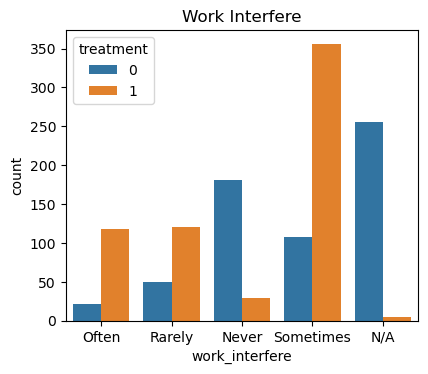

In [22]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['work_interfere'], hue=df['treatment'])
plt.title('Work Interfere')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Type')

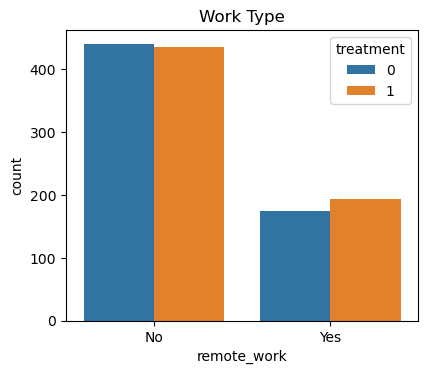

In [23]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['remote_work'], hue=df['treatment'])
plt.title('Work Type')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Benefits')

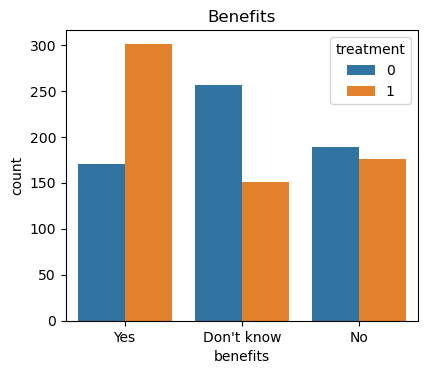

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['benefits'], hue=df['treatment'])
plt.title('Benefits')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wellness Program')

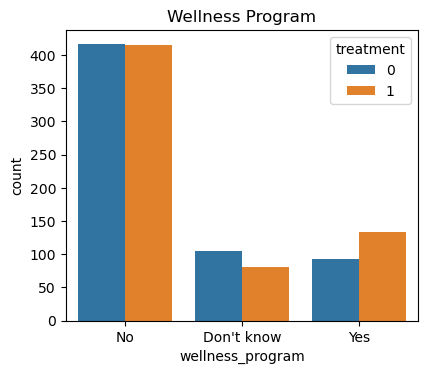

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['wellness_program'], hue=df['treatment'])
plt.title('Wellness Program')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leave')

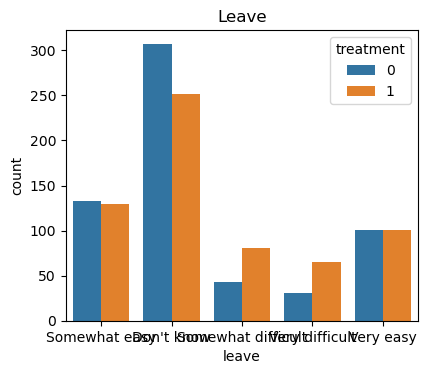

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['leave'], hue=df['treatment'])
plt.title('Leave')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mental Health Consequence')

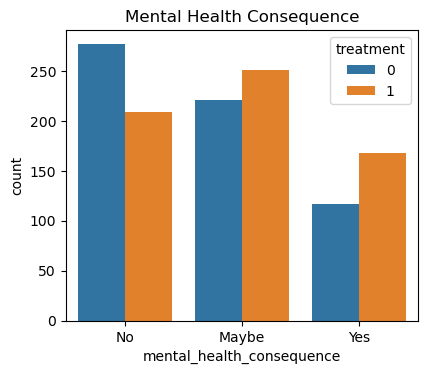

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['mental_health_consequence'], hue=df['treatment'])
plt.title('Mental Health Consequence')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequence')

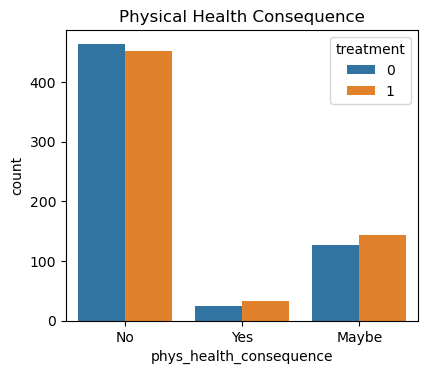

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(df['phys_health_consequence'], hue=df['treatment'])
plt.title('Physical Health Consequence')

In [29]:
df.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1243.000000,1243,1243,1243,1243.000000,1243,1243,1243,1243,1243,...,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
unique,NaN,3,2,2,NaN,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,NaN,Sometimes,26-100,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,979,1104,757,NaN,463,287,875,1020,471,...,809,559,486,916,764,509,997,552,572,1065
mean,31.975865,NaN,NaN,NaN,0.505229,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.061113,NaN,NaN,NaN,0.500174,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
X = df.drop('treatment', axis=1)
Y = df['treatment']

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [32]:
ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender', 'self_employed','family_history', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence'])],remainder='passthrough')
#Write a Loop for fitting LabelEncoder on columns_to_encode


In [33]:
X = ct.fit_transform(X)

In [34]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=20)

In [36]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1118, 22) (125, 22) (1118,) (125,)


Model Training

In [37]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
steps_rfc = [('Scaler', StandardScaler()),
             ('clf', RFC(n_estimators = 40))]



clf_rfc = Pipeline(steps=steps_rfc)


clf_rfc.fit(X_train, Y_train)

y_pred_rfc = clf_rfc.predict(X_test)
print('RFC accuracy: ', accuracy_score(y_true=Y_test, y_pred=y_pred_rfc)*100)

RFC accuracy:  86.4


In [38]:
import pickle

In [39]:
filename = 'mental_model.sav'
pickle.dump(clf_rfc, open(filename, 'wb'))